In [36]:
import pandas as pd
import numpy as ny
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as ml
import seaborn as sn

In [37]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
train_df.shape

(891, 12)

In [41]:
test_df.shape

(418, 11)

In [42]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [47]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [48]:
print(train_df['Sex'].unique())


['male' 'female']


In [49]:
print(train_df['Embarked'].unique())


['S' 'C' 'Q' nan]


In [50]:
def data_preprocessing(df, is_train=True):
    dropping_columns = ["Name","Ticket","Cabin","PassengerId"]
    df = df.drop(columns = dropping_columns,errors = 'ignore')
    if "Age" in df.columns:
        df['Age'] = df['Age'].fillna(df['Age'].median())
    if "Embarked" in df.columns:
        df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
        df = pd.get_dummies(df, columns=["Embarked"], drop_first=True,dtype=int)

    if 'Fare' in df.columns:
        df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    if 'Sex' in df.columns:
     df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

    if is_train:
        X = df.drop(["Survived"],axis = 1)
        y = df["Survived"]
        return X,y
    else:
        return df
        
    


In [51]:
x_train,y_train = data_preprocessing(train_df,True)

In [52]:
print(x_train)

     Pclass  Sex    Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
0         3    1  22.00      1      0    7.2500           0           1
1         1    0  38.00      1      0   71.2833           0           0
2         3    0  26.00      0      0    7.9250           0           1
3         1    0  35.00      1      0   53.1000           0           1
4         3    1  35.00      0      0    8.0500           0           1
5         3    1  28.00      0      0    8.4583           1           0
6         1    1  54.00      0      0   51.8625           0           1
7         3    1   2.00      3      1   21.0750           0           1
8         3    0  27.00      0      2   11.1333           0           1
9         2    0  14.00      1      0   30.0708           0           0
10        3    0   4.00      1      1   16.7000           0           1
11        1    0  58.00      0      0   26.5500           0           1
12        3    1  20.00      0      0    8.0500           0     

In [53]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

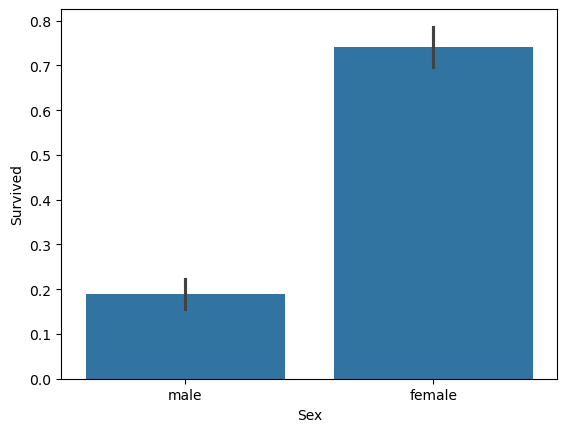

In [54]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

plt = sn.barplot(x="Sex",y="Survived",data=train_df)
train_df.groupby("Sex")["Survived"].mean() *100



## Survival Rate by Gender 
The above bar chart shows the survival rate by gender, there is a significant difference between them. The Average survival rate of females was aroud 74% whereas the men's survival rate stayed at only 18%. This mean gender is highly correlated with survival rate.

<Axes: xlabel='Age', ylabel='Count'>

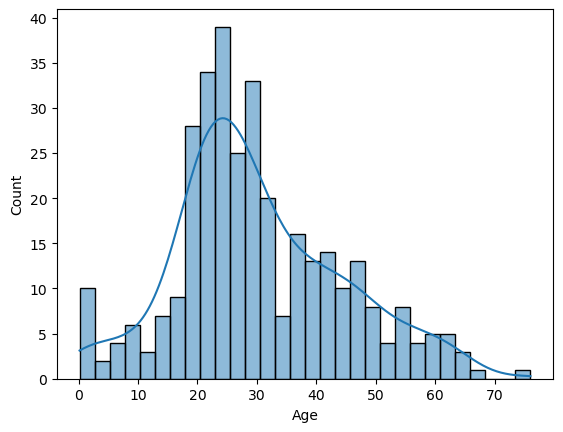

In [55]:
sn.histplot(test_df["Age"], bins=30, kde=True)




### The Surival rate of people with an age group of 18-35 had much higher as compared to others

In [56]:
X_train, X_test, Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)


In [57]:
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [58]:
new_y_predict = model.predict(X_test)

In [59]:
new_y_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(Y_test, new_y_predict))
print(confusion_matrix(Y_test, new_y_predict))
print(classification_report(Y_test, new_y_predict))

Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [61]:
procesed_data = data_preprocessing(test_df,False)
predicted_data = model.predict(procesed_data)

In [62]:
submission_file = pd.DataFrame({"PassengerId":test_df["PassengerId"],"Survived":predicted_data})


In [63]:
submission_file.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
submission_file.to_csv("submission.csv", index=False)

# Titanic Survival Prediction - Final Report

## 📌 Project Overview
This notebook predicts whether a passenger survived the Titanic disaster based on historical data.  
It uses supervised machine learning (Logistic Regression) to classify survival outcomes.

---

## **1. Understanding the Problem**

**Problem Statement:**  
Predict passenger survival using the dataset `train.csv` and test the model on `test.csv`.

**Type:**  
- Supervised Learning  
- Classification problem (binary output: 0 or 1)

**Target Column:**  
`Survived` — 0 = dead, 1 = alive

**Features (Variables):**  
Passenger ID, Age, Gender, Fare, etc.

---

## **2. Loading & Exploring Data**

Steps:  
1. Loaded data using `pandas.read_csv()`  
2. Viewed dataset information and structure using:
    ```python
    data.info()
    data.describe()
    data.head()
    data.isnull().sum()
    ```

Purpose: To understand data types, missing values, and overall structure.

---

## **3. Data Cleaning & Preprocessing**

Tasks performed:  
- Dropped `Cabin` (too many missing values)  
- Converted categorical values (`male` → 1, `female` → 0)  
- Filled or removed missing values  
- Created a reusable data cleaning function  

Outcome: Dataset was clean, numeric, and ready for model training.

---

## **4. Model Training & Evaluation**

Model used: **Logistic Regression** (`sklearn.linear_model.LogisticRegression`)  

Why Logistic Regression?  
- Effective for binary classification problems  
- Easy to implement and interpret  

Training Example:
```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
```

**Accuracy Achieved:** ~81% on validation data

---

## **5. Testing with Unseen Data**

- Used the trained model to predict survival on `test.csv`  
- Generated predictions for submission

---

## **6. Kaggle Submission Results**

- Submitted predictions to Kaggle  
- **Public Leaderboard Score:** 0.76

---

## **✅ Conclusion & Learnings**

- Learned complete ML workflow: loading, exploring, cleaning, training, testing, and submission  
- Reinforced importance of data preprocessing for better accuracy  
- Built confidence to move towards more complex ML problems

**Next Step:** Apply the same structured workflow to other datasets and improve feature engineering techniques.


In [65]:
import nbconvert

In [68]:
!jupyter nbconvert --to html my_notebook.ipynb


[NbConvertApp] WARNING | pattern 'my_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
   